In [1]:
# Loads the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import linear_model


In [2]:
# Imports the data
data=pd.read_csv('C:/Users/jonat/OneDrive/Desktop/data.csv')

In [3]:
# Displays the raw data
data

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17
...,...,...,...,...,...,...,...,...,...,...,...
62179,23,2017-03-18 18:42:28-07:00,67348,5,1,0,61.07,0,1,3,18
62180,21,2017-03-18 18:52:35-07:00,67955,5,1,0,61.07,0,1,3,18
62181,25,2017-03-18 19:02:40-07:00,68560,5,1,0,56.71,0,1,3,19
62182,18,2017-03-18 19:12:47-07:00,69167,5,1,0,56.71,0,1,3,19


<AxesSubplot:>

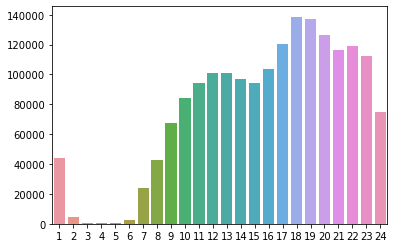

In [4]:
peopleByHour = []
for i in range(1,25):
    totalPeoplePerHour = 0
    for index, row in data.iterrows():
        if(row['timestamp']/3600 > i - 1 and row['timestamp']/3600 < i):
            totalPeoplePerHour += row['number_people']
    peopleByHour.append(totalPeoplePerHour)

sb.barplot(x=list(range(1,25)), y=peopleByHour)


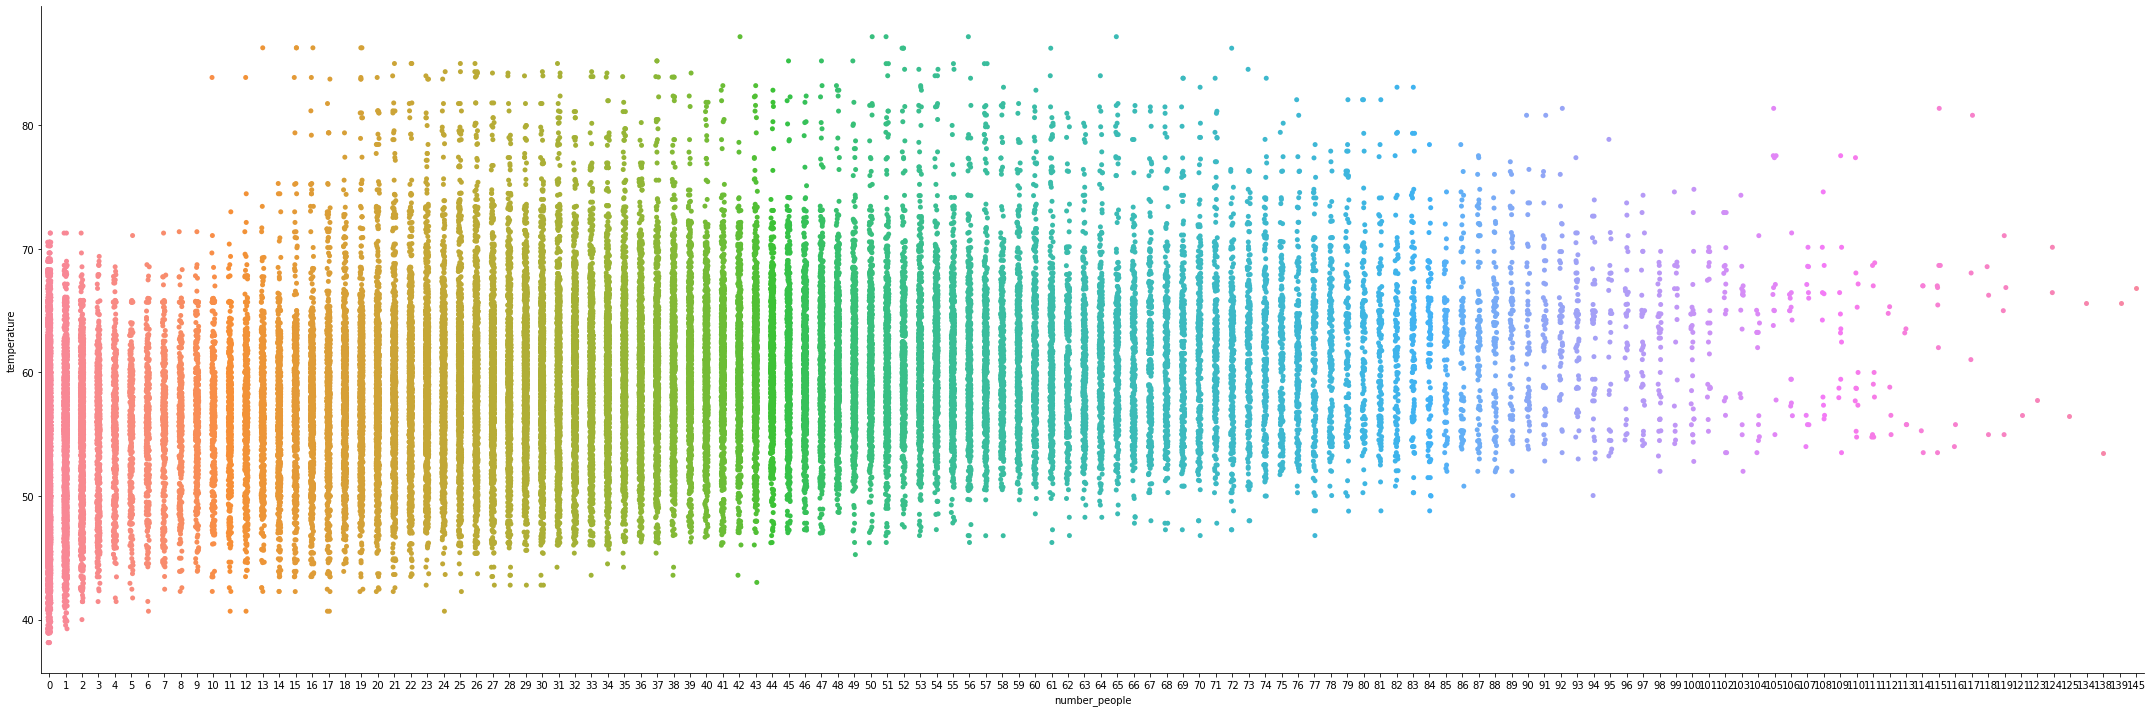

In [5]:
sb.catplot(x='number_people', y='temperature', data=data, height=10, aspect=30/10)


In [6]:
lin_reg = linear_model.LinearRegression()
lin_reg.fit(data[['timestamp','temperature']],data.number_people)

LinearRegression()

In [7]:
lin_reg.coef_

array([4.66907584e-04, 1.01019860e+00])

In [8]:
lin_reg.intercept_

-51.46587062195055

In [12]:
lin_reg.predict([[20000,65]])

array([23.53519006])